# GÖKSU GÜZ - 150180715

# BLG454E - Learning From Data, Homework 3

In this homework, you are supposed to implement following parts:

 -  **Part 1: Soft-margin SVM loss and one-versus-all classification (40 points)**
     - Refer to Machine Learning Blinks 8 and 9 for this part.
     - ML Blinks 8: https://www.youtube.com/watch?v=KWp_TxnWfSU&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     - ML Blinks 9: https://www.youtube.com/watch?v=7bIVFiKpMfg&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 2: practice dimensionality reduction (20 points)**
     - Refer to Machine Learning Blinks 10 and 11 for this part:
     - ML Blinks 10: https://www.youtube.com/watch?v=laeth5oT9YM&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     - ML Blinks 11: https://www.youtube.com/watch?v=mRmVKNklE9I&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 3: solve an SVM optimization problem by hand (40 points)**
 
 
 ### Important Notes:
   - Please complete this template and include any other necessary materials (screenshots of your handwritten solutions etc.) into the HW3 folder. Then zip it again and submit to Ninova.
   - For Part 1, you need to implement the required functions and gradients etc. by yourself. Do not use autograd or any built-in functions.
   - For the Part 2, you can use scikit-learn built-in functions for training a learner, feature selector and PCA. 
   - At Part 3, you can upload the screenshots of your handwritten solutions to the Notebook. But please be sure that your solutions are neat and can be read properly.
   - You can ask your questions on Ninova message board or send an e-mail to akti15@itu.edu.tr.
    



In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1.1: Code up gradient descent for the softmax approximation of SVM loss (20 points)

We have seen the margin perceptron and its implementation at previous lectures. SVM loss also uses the margin loss as base and tries to define and maximize a margin between classes as the following figure shows.


<img src="images/part1-1.png" width = "450">


The soft-margin SVM loss with regularization can be calculated using following equation.

<br>
<center> $g(b, w) = \sum_{p=1}^{P} max(0, 1 - y_{p}(b + x_{p}^T w)) + \lambda\left \| w \right \|_2^2$ </center>
<br>

We can write this loss formula using the softmax approximation as follows:


<br>
<center> $g(b, w) = \sum_{p=1}^{P} log ( 1 + e^{- y_{p}(b + x_{p}^T w)}) + \lambda\left \| w \right \|_2^2$ </center>
    
<br>   

Please note that the following template creates w and x vectors as $ \tilde{x}_{p} = \begin{bmatrix} 1\\x_{p}\end{bmatrix}^T$ and $\tilde{w} = \begin{bmatrix}b\\w \end{bmatrix} $

We will use gradient descent to minimize softmax approximation of soft-margin SVM loss in order to fit a linear classifier on given overlapping 2-class dataset.

Following function loads data, creates X and y matrices.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname,header = None))

    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    
    return X,y

**(10 points)** The following function finds the optimal w values for the given input. The parameters of the function are samples in X, labels in y, initial w value, learning rate alpha and the regularization parameter $\lambda$. You need to calculate the gradient of the given **softmax approximated SVM loss with regularization**  function and apply gradient descent (you can use Vanilla gradient descent here). **Do not forget to add the regularization term into gradient and remind that bias term should not be included in regularization.**

In [3]:
### TODO: YOUR CODE GOES HERE ###
# run gradient descent
def gradient_descent_soft_cost(X,y,w,alpha,lam):
    # start gradient descent loop
    max_its = 10000
    for k in range(max_its):
        temp = 1 / (1 + np.exp(-(1-y * (X @ w))))
        grad_w = -X.T @ (temp * y) + 2*lam*w
        w = w - alpha * grad_w
    return w

**(5 points)** The following plot function plots the data points and the separating line. Here, you need to add $x_1$ and $x_2$ lines to the plot in order to see the margins as shown in Fig 4.14 above. Please show the margins with dashed lines in order to get a better visualisation.

In [4]:
### TODO: YOUR CODE GOES HERE ###
# plotting functions
def plot_all(X,y,w,lam):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(-1,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    plt.plot(s,2/np.linalg.norm(w)+((-w[0]-w[1]*s)/w[2]),color = 'm',linewidth = 1)
    plt.plot(s,-2/np.linalg.norm(w)+((-w[0]-w[1]*s)/w[2]),color = 'y',linewidth = 1)
    #### HINT ####
    # The above line is b + X.T w = 0 or ax + by + c = 0 as a is w[1], b is w[2] and c is w[0]
    # It is written in form of y = ( - c - ax )/b
    # You need to plot b + X.T w = +1 and b + X.T w = -1 which means ax + by + c = +1 and ax + by + c = -1
    
    # Plot the line equations with following 2 lines of code
    

    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('soft-margin svm with lambda = ' + str(lam))
    plt.show()

In the following cell you need to run 5 experiments which are:
   - No regularization
   - Regularization with $\lambda = 10^{-2}$
   - Regularization with $\lambda = 10^{-1}$
   - Regularization with $\lambda = 1$
   - Regularization with $\lambda = 10$

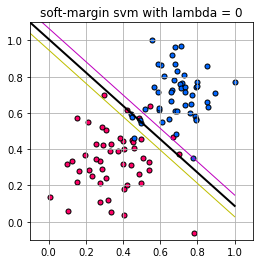

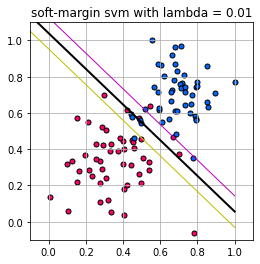

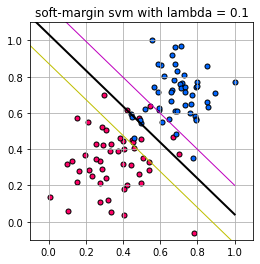

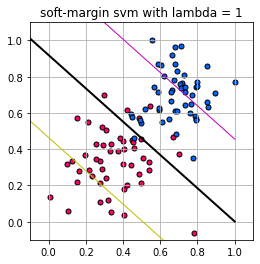

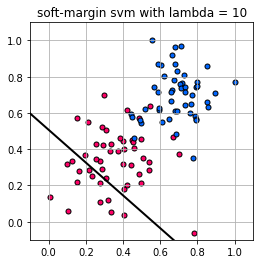

In [5]:
# load data
X,y = load_data('overlapping_2class.csv')

alpha = 10**(-2)
w0 = np.random.randn(3,1)

lams = [0, 10**-2, 10**-1, 1, 10]
for lam in lams:
    # run gradient descent
    w = gradient_descent_soft_cost(X,y,w0,alpha,lam)

    # plot points and separator
    plot_all(X,y,w,lam)

**(5 points)** Answer the following questions.
 - What is the effect of regularization and lambda value on learner?
 - Briefly explain your experiment results. What is your observation on the best lambda value?


-------What is the effect of regularization and lambda value on learner?-------
    
    Lambda is used to prevent overfitting; thus it can reduce the variance of the regression parameters, it can take values from 0 to infinity. This value is adjustable, it can give large margin classifier but it also causes bias to be greater with the increase in the margin. 
    

-------Briefly explain your experiment results. What is your observation on the best lambda value?-------

    The experiment worked as i expected. As the value of lambda increases, so does the margin. When I look at the graphs, I think the margin becomes the most accurate when the lambda is 0.1. The error rate increases in lambda values after 0.1. Values below 0.1 gave better results than values above.

## Part 1.2: Code up gradient descent for one-versus-all classifier (20 points)

In this part, you are supposed to apply classification on a toy dataset which contains $C = 4$ classes.

<img src="images/part1-2.png" width = "400">

As we have seen in the lectures, for OvA (One-versus-all) classification, we need to train 1 classifier for each class and then combine their outputs to get a single classifier that can separate all classes. For this experiment, you can use the **gradient descent for softmax loss** implementation that we have done at Tutorial 3, there can be minor changes needed due to matrix shape changes. **(4 points)**

In [6]:
### TODO: YOUR CODE GOES HERE ###
# gradient descent function for softmax cost/logistic regression 
def softmax_grad(X,y):
    # Initializations 
    w = np.random.randn(3,1)      # random initial point
    alpha = 10**-2
    max_its = 2000
    for k in range(max_its):
        s = 1/ (1 + np.exp(-(-y * (X @ w))))
        grad_w = -X.T @ (s * y)
        w = w - alpha * grad_w
    return w

**(8 points)** In the following cell, you need to train 1 classifier for each class. While sending the samples and labels into the optimizer, you need to assign the label for class C as -1 and the labels for all other classes should be assigned as 1 temporarily since we are doing one-versus-all classification. We keep the weight vectors for each class in W matrix in order to use them later for evaluating the performance.

In [7]:
### TODO: COMPLETE ONE VERSUS ALL SNIPPET BELOW ###
# learn all C separators
def learn_separators(X,y):
    W = []
    classes = np.unique(y)
    temp = y.copy()
    for c in classes:
        for i in range(len(y)):
            if y[i] == c:
                temp[i] = 1
            else:
                temp[i] = -1
        w = softmax_grad(X, temp)
        W.append(w)
    W = np.asarray(W)
    W.shape = (np.shape(W)[0],np.shape(W)[1])
    W = W.T
    return W

**(8 points)** Now, using the weight vectors we determined, we need to classify the samples in given matrices and calculate the overall accuracy score. In order to decide the class of a given sample using OvA classifier, we can use following formula:

<br>
<center> $y = \underset{j = 1, 2, ..., C}{argmax} \ b_j + x^T w_j$ </center>
<br>


**Please do not loop over all samples but use the vectorized calculations.**

After predicting the labels for all samples in given set, we can calculate the accuracy as:

<br>
<center> $ Accuracy = \frac{\#correct \ predictions}{\#total \ samples} $ </center>
<br>

Please be careful about the sizes of y and y_pred vectors and remind that the class numbers are starting from 1, not 0.

In [8]:
### TODO: COMPLETE ACCURACY SCORE FUNCTION BELOW ###

def accuracy_score(X, y, W):
    a = np.dot(X, W[:,0]) 
    b = np.dot(X, W[:,1])
    c = np.dot(X, W[:,2]) 
    d = np.dot(X, W[:,3]) 
    new = np.vstack((a, b, c, d)).T
    new = new.argmax(1) + 1
    y = np.transpose(y)
    c = (new == y)
    x = np.sum(c)
    accuracy = x/len(a)*(100)
    return accuracy
    

In [9]:
# plot data, separators, and fused fule
def plot_all(X,y,W):
    # initialize figure, plot data, and dress up panels with axes labels etc.
    X = X.T
    num_classes = np.size(np.unique(y))
    color_opts = np.array([[1,0,0.4], [ 0, 0.4, 1],[0, 1, 0.5],[1, 0.7, 0.5],[0.7, 0.6, 0.5]])
    f,axs = plt.subplots(1,3,facecolor = 'white',figsize = (10,3))
    for a in range(0,3):
        for i in range(0,num_classes):
            s = np.argwhere(y == i+1)
            s = s[:,0]
            axs[a].scatter(X[1,s],X[2,s], s = 30,color = color_opts[i,:])

        # dress panel correctly
        axs[a].set_xlim(0,1)
        axs[a].set_ylim(0,1)
        axs[a].axis('off')

    r = np.linspace(0,1,150)
    for i in range(0,num_classes):
        z = -W[0,i]/W[2,i] - W[1,i]/W[2,i]*r
        axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])

    # fuse individual subproblem separators into one joint rule
    r = np.linspace(0,1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((np.ones((np.size(s),1)),s,t),1)
    f = np.dot(W.T,h.T)
    z = np.argmax(f,0)
    f.shape = (np.size(f),1)
    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    for i in range(0,num_classes + 1):
        axs[2].contour(s,t,z,num_classes-1,colors = 'k',linewidths = 2.25)

Now, we are ready to train and test our learner. At the end, you should get at least 70% accuracy.

Accuracy:  72.5


<ipython-input-9-97b545bf50af>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])
<ipython-input-9-97b545bf50af>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])
<ipython-input-9-97b545bf50af>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])
<ipython-input-9-97b545bf50af>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(r,z,'-k',linewidth = 2,color = c

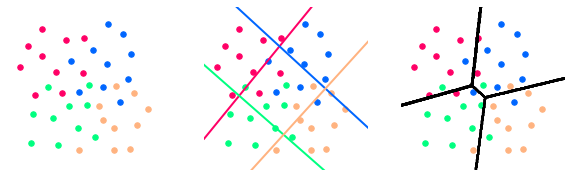

In [10]:
X ,y  = load_data('four_class_data.csv')

# learn all C vs notC separators
W = learn_separators(X,y)

# calculate accuracies for both training and testing sets
accuracy = accuracy_score(X, y, W)

print("Accuracy: ", accuracy)

# plot data and each subproblem 2-class separator
plot_all(X, y, W)

## Part 2: Feature selection using scikit-learn (20 points)

In this part, we will use scikit-learn library. You can install the necessary package using following commands:

        > python3 -m pip install scikit-learn
        > conda install -c conda-forge scikit-learn
        
There are lots of machine learning techniques that are available in scikit-learn library. In this problem we will use the **SVM** classifier with linear kernel and:
   
 **1)** Apply feature selection on data using Variance Threshold and examine the results.
    
 **2)** Apply dimensionality reduction with PCA to plot the data on 2D space.

You can check the documentations on the internet to learn how to use these functions and which parameters to use. Necessary functions are imported below.

In [11]:
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import sklearn.datasets as ds

from sklearn.model_selection import train_test_split

We will implement feature selection on handwritten digits dataset. In the following cell we load and examine dataset. As you can see the samples are 8 by 8 images where in each row of X, the images are kept as flatten. Each feature represents a pixel (i.e 0th feature is (0, 0) pixel and 8th feature is (1, 0) pixel.

Number of samples:  1797
Number of attributes:  64
Classes:  [0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

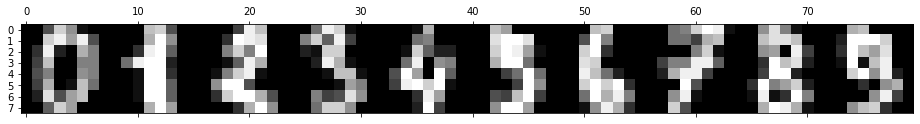

In [12]:
digit_data = ds.load_digits()
print("Number of samples: ", digit_data.data.shape[0])
print("Number of attributes: ", digit_data.data.shape[1])
print("Classes: ", digit_data.target_names)

c = digit_data.images[0]
for i in range(1, 10):
    c = np.concatenate((c, digit_data.images[i]), 1)

plt.gray() 
plt.matshow(c)
plt.show()

Then we split the data into training and testing sets in order to train the models on training set and test them on unseen test set.

In [13]:
X, y = digit_data.data, digit_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=20)

print("Number of training samples: ", X_train.shape[0])
print("Number of testing samples: ", X_test.shape[0])

Number of training samples:  1437
Number of testing samples:  360


In the following cell, you are given the necessary train and test functions, you can use them directly.

In [14]:
def train(X, y):
    
    classifier = SVC(gamma="auto", kernel="linear")
    classifier = classifier.fit(X,y)
    
    preds = classifier.predict(X)
    
    train_accuracy = np.mean(preds==y)
    
    return classifier, train_accuracy

def test(classifier, X, y):
    
    test_accuracy = np.mean(classifier.predict(X) == y)
    
    return test_accuracy

First, let's train an SVM on the whole data and print the accuracies on training and test sets.

In [15]:
# SVM classifier without feature selection
svm, train_acc = train(X_train, y_train)
test_acc = test(svm, X_test, y_test)

print("Train acc: ", train_acc)
print("Test acc: ", test_acc)

Train acc:  1.0
Test acc:  0.975


**(5 points)** Now, fit a Variance Threshold feature selector on data. Print the number of selected features and the accuracies on training and test sets. Check the selected features. (You can use methods of VarianceThreshold to get the selected feature indexes.) 

In [16]:
##TODO: YOUR CODE GOES HERE##
#SVM classifier with Variance Threshold

xtrain1 = pd.DataFrame(data=X_train)
var_thresh = VarianceThreshold()
xtrain1 = var_thresh.fit_transform(X_train)
print("Number of selected features of X_train: ", sum(var_thresh.get_support()))
xtest1 = var_thresh.transform(X_test)
svm, train_acc = train(xtrain1, y_train)
test_acc = test(svm, xtest1, y_test)

print("Train acc: ", train_acc)
print("Test acc: ", test_acc)


Number of selected features of X_train:  60
Train acc:  1.0
Test acc:  0.975


**(5 points) Question:**
- Compare the results of training with and without feature selection, what is your observation?
- Which features are eliminated? Comment on them by referring the method and the images displayed at load data cell.
- What type of feature selector the Variance Threshold is? Briefly explain.

-----Compare the results of training with and without feature selection, what is your observation?-----
       
       Training with feature selection is better because as the number of features decreases, training process 
       becomes faster. Also with feature selection, complexity of the model decreases, accuracy may increase.
    
-----Which features are eliminated? Comment on them by referring the method and the images displayed at load data cell.-----
    
        Features with zero variances are eliminated, there were 64 features 4 of them are deleted.


-----What type of feature selector the Variance Threshold is? Briefly explain.-----
    
      It is a baseline approach. It removes all features with zero variances.


**(5 points)** We cannot visualize the data in 2D space since the feature space is high dimensional. So, we need to reduce it into 2 dimensions to plot them. In the following cell, use PCA to reduce the dimension of data and then plot the data samples in a 2D plot as each class is visualized with a different color. Then, simply train a classifier on reduced data to evaluate it. Print the accuracies on train and test sets again.

(1437, 2)
(360, 2)
Train acc:  0.6242171189979123
Test acc:  0.6194444444444445


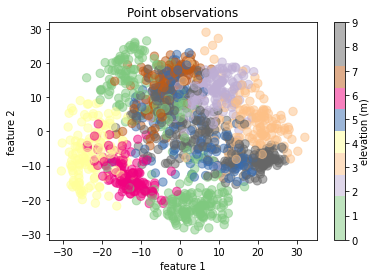

In [17]:
##TODO: YOUR CODE GOES HERE##
import pylab
# PCA for dimensionality reduction
pca = PCA(2)
temp1 = pca.fit(X_train)
transformed = temp1.transform(X_train)
print(transformed.shape)
transformed2 = pca.transform(X_test)
print(transformed2.shape)

svm, train_acc = train(transformed, y_train)
test_acc = test(svm, transformed2, y_test)

print("Train acc: ", train_acc)
print("Test acc: ", test_acc)

marker_size=70
plt.scatter(transformed[:,0], transformed[:,1], marker_size, c=y_train, alpha=0.5, cmap=plt.cm.get_cmap('Accent', 10))
plt.title("Point observations")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
cbar= plt.colorbar()
cbar.set_label("elevation (m)", labelpad=+1)
plt.show()




**(5 points) Question:**

- What do you think about the data distribution considering evaluation? Is 2 dimensions are enough to represent this data? 
- Both Variance Threshold and PCA are used for dimensionality reduction and reduced the size of feature space. What is the main difference between these two methods based on types of dimensionality reduction? Explain.

--What do you think about the data distribution considering evaluation? Is 2 dimensions are enough to represent this data?--
    
        I do not think it is enough because there were 64 dimensions but we decreased it to 2, so when we are
        making interpretations this may cause problems due to the loss of the features.
    


--Both Variance Threshold and PCA are used for dimensionality reduction and reduced the size of feature space. What is the main difference between these two methods based on types of dimensionality reduction? Explain.--

    The main difference is that threshold is safer, because it only eliminates the zero variance features to 
    improve the performance, however with PCA we can change the dimension as mush as we want, so the feature losses 
    may occur, but sometimes when there are too many features, using pca can cause us to get more 
    accurate results, because too many features can sometimes reduce the power of interpretation.

## Part 3: Solving SVM optimization by hand (40 points)

You can insert the screenshots of your handwritten solution on Jupyter Notebook. For an example, check the cells including images. Do not forget to include your solution image file into the submitted .zip file.

Some reminders for the question:

 - Lagrangian to optimize: $\mathcal{L}_{primal} = \sum_{i=1}^{n} a_{i} - \frac{1}{2} [\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}^{T}x^{j}] $ 


- Constraint: $\sum_{i=1}^{n} \alpha_{i} y_{i} = 0$


- Optimal parameter: $w^{*} = \sum_{i=1}^{n} \alpha_{i} y_{i} x^{i}$

### Part 3.1 (20 points)

<p style="float: left;"><img src="images/part3-1.png" width = "200"></p>
        
        Given the two following training samples (n=2), provide below a step-by-step solution
        to estimate the optimal parameters (w and b) of the hyperplane separating the two classes.

### Part 3.1 Solution

*Double click here to insert your solution.*
<img src="images/3.1.jpg" width = "2000">

### Part 3.2 (10 points) 
If we add a third training point $x_3 = \left [\begin{matrix} -1 \\ 0 \end{matrix}\right] $, will that impact the hyperplane estimated using points $x_1$ and $x_2$? Answer this considering two cases where label for $x_3$ is (1) positive, (2) negative and justify.

### Part 3.2 Solution

*Double click here to insert your solution.*
<img src="images/3.2.1.jpg" width = "2000">
<img src="images/3.2.2.jpg" width = "2000">

### Part 3.3 (10 points)
Explain how to classify the point $x_{test} = \left [\begin{matrix} 1 \\ -4 \end{matrix}\right] $ using the estimated model. What is the predicted label of $x^{test}$? 

### Part 3.3 Solution

*Double click here to insert your solution.*
<img src="images/3.3.jpg" width = "2000">